# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

def linan(fEquation,sEquation):
  a = np.asarray(fEquation.split())
  b = np.asarray(sEquation.split())
  try:
    aFin = np.array( [[a[0], a[1]] , [b[0], b[1]]] , dtype=np.float32 )
    bFin = np.array([a[2],b[2]], dtype=np.float32)
    x = np.linalg.solve(aFin, bFin)
    print(x[0],x[1])
  except Exception as ex:
    print("You've entered wrong equation")
    pass
linan("1 2 4","1 3 5.5")

# enter you code

1.0 1.5


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
import numpy as np

def decorate_matrix(n):
  s = (n,n)
  d = np.zeros(s)
  d[0, :] = 1
  d[n - 1, :] = 1
  d[:, 0] = 1
  d[:, n - 1] = 1

  print(d)
decorate_matrix(5)

[[1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy import optimize
import numpy as np
def f(x,a,b):
  return(((a+x)**2)-b)
def f1(x,a,b):
  return(abs(((a+x)**2)-b))
def minimum_functions(a,b):
  print(optimize.minimize(f, x0=0, args=(a,b)).x)
  print(optimize.minimize(f1, x0=0, args=(a,b)).x)
minimum_functions(3,4)

[-2.99999998]
[-1.00000001]


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

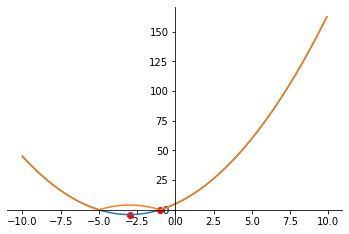

In [ ]:
from scipy import optimize
import numpy as np
def f(x,a,b):
  return(((a+x)**2)-b)
def f1(x,a,b):
  return(abs(((a+x)**2)-b))
def minimum_functions(a,b):
  min1 = optimize.minimize(f, x0=0, args=(a,b)).x
  min2 = optimize.minimize(f1, x0=0, args=(a,b)).x
  x = np.arange(-10, 10, 0.1)
  ax = plt.gca()
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  plot1 = plt.figure(1)
  plt.plot(x, f(x,a,b))
  plt.scatter(min1,f(min1,a,b),color = 'red', label = 'Min1')
  plt.plot(x, f1(x,a,b))
  plt.scatter(min2,f1(min2,a,b),color = 'red', label = 'Min2' )
  plt.show()
minimum_functions(3,4)

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
import operator as op
from functools import reduce

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  
def bernulli(p,k,n):
  q=1-p
  return ncr(n,k)*(p**k)*(q**(n-k))
print("First:")
print(1-bernulli(2*(1/2)**10,0,1000))
print("Second:")
print(1-bernulli(2*(1/2)**(10-8+1),0,1000))
print("Third:")
print(bernulli(2*(1/2)**10,3,1000))



First:
0.858440454732242
Second:
1.0
Third:
0.1762873858121736
